<a href="https://colab.research.google.com/github/mulherinstephen/avalanche/blob/main/teton_DEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install elevation
!pip install richdem
!pip install earthpy

!pip install pysolar

     |████████████████████████████████| 71kB 5.3MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
     |████████████████████████████████| 4.5MB 13.5MB/s 
     |████████████████████████████████| 1.4MB 10.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0MB 46.8MB/s 
     |████████████████████████████████| 19.1MB 1.2MB/s 
     |████████████████████████████████| 14.8MB 132kB/s 
     |████████████████████████████████| 6.5MB 45.0MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp37-none-any.whl size=1365089 sha256=a05188ea7a352c410ab81632f60260645e157d2fc714733090190dbdeb31a87f
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successf

In [12]:
import numpy as np
import matplotlib
from matplotlib import colors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import richdem as rd
import os
import earthpy.plot as ep
import earthpy.spatial as es
from pysolar.solar import *
import datetime
import pytz
import ipywidgets as widgets
import elevation

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dem_path = os.path.join(os.getcwd(), 'Teton-30m-DEM.tif')
elevation.clip(bounds=(-110.9, 43.6, -110.7, 43.9), output=dem_path)
elevation.clean()
teton_dem = rd.LoadGDAL(dem_path)

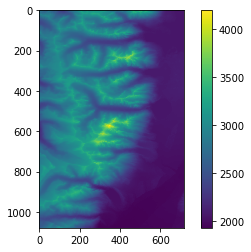

In [6]:
plt.imshow(teton_dem, interpolation='none')
plt.colorbar()

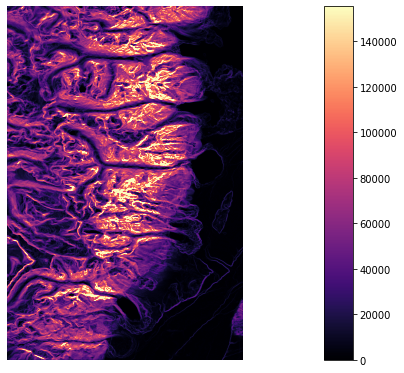

{'vmax': 155396.671875, 'vmin': 0.0}

In [7]:
slope = rd.TerrainAttribute(teton_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))

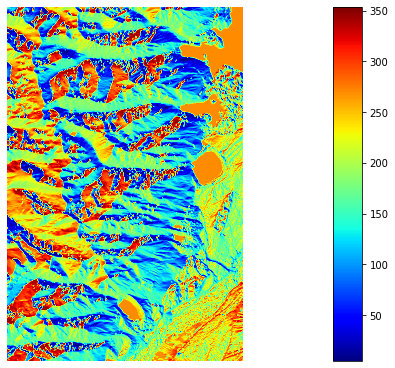

{'vmax': 353.3333435058594, 'vmin': 5.013113975524902}

In [8]:
aspect = rd.TerrainAttribute(teton_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))

In [9]:
np.save('aspect.npy', aspect)
np.save('elevation.npy', teton_dem)
np.save('slope.npy',slope)

aspect_array=np.load('aspect.npy')
elevation_array=np.load('elevation.npy')
slope_array=np.load('slope.npy')

In [10]:
def danger(date,ampm):
  cmap = ListedColormap(["white","green", "yellow", "orange"])
  norm = colors.BoundaryNorm([0, 1828.8, 2286, 2743.2, 3200.4], 4)

  fig, ax = plt.subplots(figsize=(20, 10))
  ep.plot_bands(elevation_array,cmap=cmap,cbar=False,title="Teton Area Danger Rating",norm=norm,ax=ax)
  hillshade=es.hillshade(elevation_array)
  ax.imshow(hillshade, cmap="Greys", alpha=0.5)

dates_slider= widgets.DatePicker(description='Date',disabled=False,value=datetime.datetime.now())
ampm_slider = widgets.ToggleButtons(
    options=['MORNING','AFTERNOON'],
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Danger Rating for Morning of Specified Date', 'Danger Rating for Afternoon of Specified Date'],
)

out = widgets.interactive_output(danger, {'date': dates_slider, 'ampm':ampm_slider})

widgets.HBox([widgets.VBox([dates_slider,ampm_slider]), out])

In [11]:
def hillshade(date,hour,minute):

  my_date=datetime.datetime.combine(date,datetime.time(hour, minute))
  timezone=pytz.timezone('MST')
  my_date=timezone.localize(my_date)

  altitude=get_altitude(43.75, -110.8, my_date)
  azimuth=get_azimuth(43.75, -110.8, my_date)

  my_hillshade = es.hillshade(elevation_array, azimuth=azimuth, altitude=altitude)
  ep.plot_bands(my_hillshade, cbar=False, title="Hillshade", figsize=(20, 10) )

dates_slider= widgets.DatePicker(description='Date',disabled=False,value=datetime.datetime.now())
hour_slider= widgets.IntSlider(description='Hour',min=0, max=23, step=1, value=8)
minute_slider= widgets.IntSlider(description='Minute',min=0, max=59, step=1, value=0)

out = widgets.interactive_output(hillshade, {'date': dates_slider, 'hour': hour_slider,'minute':minute_slider})

widgets.HBox([widgets.VBox([dates_slider,hour_slider,minute_slider]), out])